In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/Logo/Desktop/Ai project/Retail-Buyer-Segmentation/Classification/retail_customers_with_2_clusters.csv")


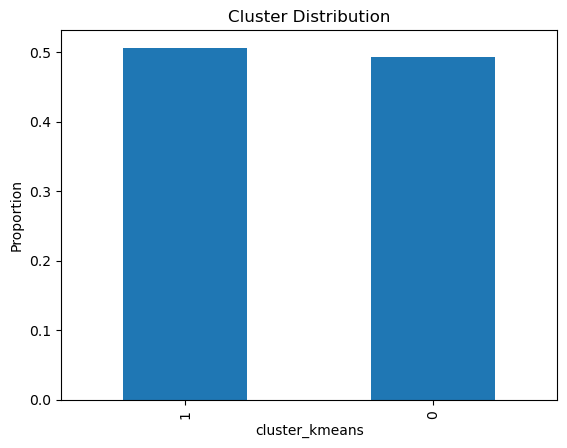

In [3]:
import matplotlib.pyplot as plt

df['cluster_kmeans'].value_counts(normalize=True).plot(kind='bar')
plt.title('Cluster Distribution')
plt.ylabel('Proportion')
plt.show()

In [4]:
selected_features = [
    "annual_income",
    "spend_wine", "spend_fruits", "spend_meat", "spend_fish",
    "spend_sweets", "spend_gold",
    "num_web_purchases", "num_catalog_purchases", "num_store_purchases",
    "num_discount_purchases",
]

categorical_features = df[selected_features].select_dtypes(include=['object', 'category']).columns.tolist()


print("Categorical features:", categorical_features)

Categorical features: []


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Load CSV

# Target column
target_col = 'cluster_kmeans'


# Define features (X) and target (y)
X = df[selected_features].values
y = df[target_col].values

# Split the data
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_dt, y_train_dt)

# Predictions
y_train_pred_dt = dt_model.predict(X_train_dt)
y_test_pred_dt = dt_model.predict(X_test_dt)

# Train Metrics
print("Decision Tree TRAIN Metrics:")
print("Accuracy:", accuracy_score(y_train_dt, y_train_pred_dt))
print("Precision (macro):", precision_score(y_train_dt, y_train_pred_dt, average='macro'))
print("Recall (macro):", recall_score(y_train_dt, y_train_pred_dt, average='macro'))
print("F1 Score (macro):", f1_score(y_train_dt, y_train_pred_dt, average='macro'))

Decision Tree TRAIN Metrics:
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0


In [7]:
# Train Metrics
print("Decision Tree TRAIN Metrics:")
print("Accuracy:", accuracy_score(y_train_dt, y_train_pred_dt))
print("Precision (macro):", precision_score(y_train_dt, y_train_pred_dt, average='macro'))
print("Recall (macro):", recall_score(y_train_dt, y_train_pred_dt, average='macro'))
print("F1 Score (macro):", f1_score(y_train_dt, y_train_pred_dt, average='macro'))

# Test Metrics
print("\nDecision Tree TEST Metrics:")
print("Accuracy:", accuracy_score(y_test_dt, y_test_pred_dt))
print("Precision (macro):", precision_score(y_test_dt, y_test_pred_dt, average='macro'))
print("Recall (macro):", recall_score(y_test_dt, y_test_pred_dt, average='macro'))
print("F1 Score (macro):", f1_score(y_test_dt, y_test_pred_dt, average='macro'))

Decision Tree TRAIN Metrics:
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0

Decision Tree TEST Metrics:
Accuracy: 0.959731543624161
Precision (macro): 0.9598053352559481
Recall (macro): 0.959676450566612
F1 Score (macro): 0.9597216659991991


In [8]:
cv_scores = cross_val_score(
    dt_model,
    X_train_dt,
    y_train_dt,
    cv=5,
    scoring="f1_macro"
)

print("CV F1 scores:", cv_scores)
print("Mean CV F1:", cv_scores.mean())


CV F1 scores: [0.97206617 0.95237946 0.938371   0.93831679 0.97478675]
Mean CV F1: 0.9551840324070742
